In [3]:
from ase.io import read
import matplotlib.pyplot as plt
import numpy as np

# Example 1 - Li3PS4

## 1.1 Loading the target and predicted data for Li3PS4 Sample

In [4]:
TARGET_ATOMS_PATH = "../shared/datasets/Li3PS4-sample/test.xyz"
PREDICTED_ATOMS_PATH = "Li3PS4-sample-test-predictions.xyz"
PREDICTED_ATOMS_DEFAULT_PATH = "../01.initial-evaluation/Li3PS4-sample-test-predictions.xyz"

target_atoms = read(TARGET_ATOMS_PATH, ":")
predicted_atoms = read(PREDICTED_ATOMS_PATH, ":")
predicted_atoms_default = read(PREDICTED_ATOMS_DEFAULT_PATH, ":")

target_energies = np.array([item.info['mtt::r2scan_energy'] for item in target_atoms])
predicted_energies = np.array([item.info['mtt::r2scan_energy'] for item in predicted_atoms])
predicted_energies_default = np.array([item.get_potential_energy() for item in predicted_atoms_default])

num_atoms = np.array([len(item) for item in target_atoms])
target_energies_per_atom = target_energies / num_atoms
predicted_energies_per_atom = predicted_energies / num_atoms
predicted_energies_per_atom_default = predicted_energies_default / num_atoms

mae = np.mean(np.abs(target_energies_per_atom - predicted_energies_per_atom)) * 1000  # Convert to meV/atom
mae_default = np.mean(np.abs(target_energies_per_atom - predicted_energies_per_atom_default)) * 1000  # Convert to meV/atom

## 2.2 Plotting the energies pairplot

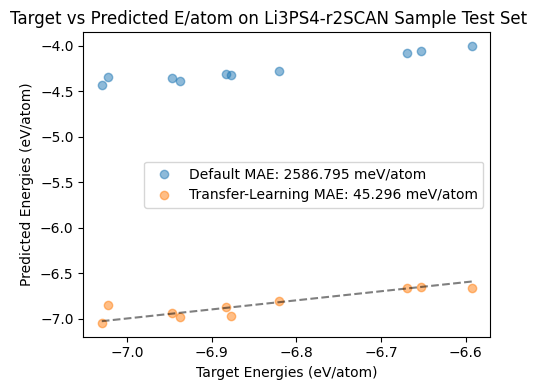

In [5]:
plt.figure(figsize=(5, 4))
plt.scatter(target_energies_per_atom, predicted_energies_per_atom_default, alpha=0.5, label='Default MAE: {:.3f} meV/atom'.format(mae_default))
plt.scatter(target_energies_per_atom, predicted_energies_per_atom, alpha=0.5, label='Transfer-Learning MAE: {:.3f} meV/atom'.format(mae))
plt.plot(
    [min(target_energies_per_atom), max(target_energies_per_atom)], 
    [min(target_energies_per_atom), max(target_energies_per_atom)],
    alpha=0.5, color='k', linestyle='--'
)
plt.xlabel('Target Energies (eV/atom)')
plt.ylabel('Predicted Energies (eV/atom)')
plt.title('Target vs Predicted E/atom on Li3PS4-r2SCAN Sample Test Set', loc='left', x=-0.18)
plt.legend()
plt.tight_layout()
plt.savefig('parity_plot_Li3PS4.png',dpi=150)
plt.show()

# Example 2 - MAD

## 2.1 Loading the target and predicted data for MAD Sample

In [6]:
TARGET_ATOMS_PATH = "../shared/datasets/MAD-sample/test.xyz"
PREDICTED_ATOMS_PATH = "MAD-sample-test-predictions.xyz"

target_atoms = read(TARGET_ATOMS_PATH, ":")
predicted_atoms = read(PREDICTED_ATOMS_PATH, ":")

target_energies = np.array([item.get_potential_energy() for item in target_atoms])
predicted_energies = np.array([item.get_potential_energy() for item in predicted_atoms])

num_atoms = np.array([len(item) for item in target_atoms])
target_energies_per_atom = target_energies / num_atoms
predicted_energies_per_atom = predicted_energies / num_atoms

mae = np.mean(np.abs(target_energies_per_atom - predicted_energies_per_atom)) * 1000  # Convert to meV/atom

## 2.2 Plotting the energies pairplot

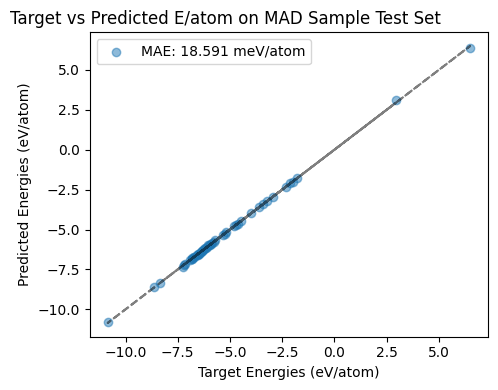

In [7]:
plt.figure(figsize=(5, 4))
plt.scatter(target_energies_per_atom, predicted_energies_per_atom, alpha=0.5, label='MAE: {:.3f} meV/atom'.format(mae))
plt.plot(target_energies_per_atom, target_energies_per_atom, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Target Energies (eV/atom)')
plt.ylabel('Predicted Energies (eV/atom)')
plt.title('Target vs Predicted E/atom on MAD Sample Test Set', loc='left', x=-0.2)
plt.legend()
plt.tight_layout()
plt.savefig('parity_plot_MAD.png',dpi=150)
plt.show()